In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 活性化関数

In [2]:
class ReLU:
    
    def __init__(self):
        self.index = None
        
    def forward(self, A):
        self.index = A < 0
        Z = A.copy()
        Z[self.index] = 0
        return Z
        
    def backward(self, dZ):
        dZ[index] = 0
        dA = dZ
        return dA

In [3]:
class Sigmoid:
    
    def __init__(self):
        self.Z = None
        
    def forward(self, X):
        self.Z = self.sigmoid(X)
        return self.Z
        
    def backward(self, dZ):
        dA = dZ * (1.0 - self.sigmoid(self.Z)) * self.sigmoid(self.Z)
        return dA
    
    def sigmoid(self, X):
        return 1.0 / (1.0 + np.exp(-X))

In [4]:
class Tanh:
    
    def __init__(self):
        self.Z = None
        
    def forward(self, A):
        self.Z = np.tanh(A)
        return self.Z
        
    def backward(self, dZ):
        dA = dZ * (1. - np.tanh(self.Z)**2)  
        return dA

In [5]:
class Softmax:
    
    def __init__(self):
        self.Z = None
    
    def forward(self, A):
        self.Z = np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
        return self.Z
        
    def backward(self, dZ):
        dA = dZ
        return dA   

## イニシャライザ

In [6]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    
    def B(self, n_nodes1, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B

In [7]:
class XavierInitializer:
    
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = (1 / np.sqrt(n_nodes1)) * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    
    def B(self, n_nodes1, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = (1 / np.sqrt(n_nodes1)) * np.random.randn(1, n_nodes2)    
        return B

In [8]:
class HeInitializer:
    
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        W = np.sqrt(2 / n_nodes1) * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    
    def B(self, n_nodes1, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        B = np.sqrt(2 / n_nodes1) * np.random.randn(1, n_nodes2)        
        return B     

## 最適化手法

In [9]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W = layer.W - self.lr  * layer.dW
        layer.B = layer.B - self.lr  * layer.dB
        
        return layer

In [10]:
class AdaGrad:
    
    def __init__(self, lr=0.01):
        self.lr = lr
        self.hB = 0
        self.hW = 0
        
    def update(self, layer):
        
        self.hB = self.hB + layer.dB * layer.dB
        self.hW = self.hW + layer.dW * layer.dW 
        
        layer.B = layer.B + self.lr *(1/np.sqrt(self.hB )) *layer.dB
        layer.W = layer.W + self.lr *(1/np.sqrt(self.hW )) * layer.dW
        
        return layer

# ＊＊＊＊＊＊＊＊【問題1】〜【問題3】をまとめて実装 ＊＊＊＊＊＊＊＊

In [11]:
class SimpleConv1d:
    
    def __init__(self, W, B):
        
        self.W = W
        self.B = B
    
    def forward(self, X):
        
        self.X = np.array([1,2,3,4]).reshape(1,-1)
        
        output_width = self.X.shape[1] - self.W.shape[1] + 1 # 出力のサイズ
        
        self.X_col = None
        for w in range(output_width):
            if self.X_col is None:
                self.X_col =  self.X[0, w:w+self.W.shape[1]].reshape(1,-1)
            else:
                self.X_col = np.concatenate([self.X_col, self.X[0, w:w+self.W.shape[1]].reshape(1,-1)], axis=0)
                
        A = self.W@self.X_col .T +self.B

        return A
    
    def backward(self, dA):
        
        self.dB = np.sum(dA)
        self.dW = dA @ self.X_col
        
        self.dZ = np.zeros((self.X.shape[0], self.X.shape[1]))
        buf_W = (np.pad(self.W, [(0, 0),(1, 1)], 'constant'))
        for h in range(self.X.shape[0]):
            for w in range(self.X.shape[1]):
                self.dZ[h, w] = dA.reshape(1,-1) @ buf_W[h, w:(w + self.W.shape[1] - 1)][::-1].T

        return self.dB, self.dW, self.dZ
    

# 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成

チャンネル数を1に限定した1次元畳み込み層のクラスSimpleConv1dを作成してください。基本構造は前のSprintで作成した全結合層のFCクラスと同じになります。なお、重みの初期化に関するクラスは必要に応じて作り変えてください。Xavierの初期値などを使う点は全結合層と同様です。  
ここでは パディング は考えず、ストライド も1に固定します。また、複数のデータを同時に処理することも考えなくて良く、バッチサイズは1のみに対応してください。この部分の拡張はアドバンス課題とします。  
フォワードプロパゲーションの数式は以下のようになります。  
## $$
a_i = \sum_{s=0}^{F-1}x_{(i+s)}w_s+b
$$
$a_i$ : 出力される配列のi番目の値  
$F$ : フィルタのサイズ  
$x_{(i+s)}$ : 入力の配列の(i+s)番目の値  
$w_s$ : 重みの配列のs番目の値  
$b$ : バイアス項  
全てスカラーです。  
次に更新式です。ここがAdaGradなどに置き換えられる点は全結合層と同様です。  
## $$
w_s^{\prime} = w_s - \alpha \frac{\partial L}{\partial w_s} \\
b^{\prime} = b - \alpha \frac{\partial L}{\partial b}
$$
$\alpha$ : 学習率  
$\frac{\partial L}{\partial w_s}$ : $w_s$ に関する損失 $L$ の勾配  
$\frac{\partial L}{\partial b}$ : $b$ に関する損失 $L$ の勾配  
勾配 $\frac{\partial L}{\partial w_s}$ や $\frac{\partial L}{\partial b}$ を求めるためのバックプロパゲーションの数式が以下です。  
## $$
\frac{\partial L}{\partial w_s} = \sum_{i=0}^{N_{out}-1} \frac{\partial L}{\partial a_i}x_{(i+s)}\\
$$
## $$
\frac{\partial L}{\partial b} = \sum_{i=0}^{N_{out}-1} \frac{\partial L}{\partial a_i}
$$
$\frac{\partial L}{\partial a_i}$ : 勾配の配列のi番目の値  
$N_{out}$ : 出力のサイズ  
前の層に流す誤差の数式は以下です。  
## $$
\frac{\partial L}{\partial x_j} = \sum_{s=0}^{F-1} \frac{\partial L}{\partial a_{(j-s)}}w_s
$$
$\frac{\partial L}{\partial x_j}$ : 前の層に流す誤差の配列のj番目の値  
ただし、 $j-s<0$ または $j-s>N_{out}-1$ のとき $\frac{\partial L}{\partial a_{(j-s)}} =0$ です。  
全結合層との大きな違いは、重みが複数の特徴量に対して共有されていることです。この場合は共有されている分の誤差を全て足すことで勾配を求めます。計算グラフ上での分岐はバックプロパゲーションの際に誤差の足し算をすれば良いことになります。  

# 【問題2】1次元畳み込み後の出力サイズの計算

畳み込みを行うと特徴量の数が変化します。どのように変化するかは以下の数式から求められます。パディングやストライドも含めています。この計算を行う関数を作成してください。  
## $$
N_{out} =  \frac{N_{in}+2P-F}{S} + 1\\
$$
$N_{out}$ : 出力のサイズ（特徴量の数）  
$N_{in}$ : 入力のサイズ（特徴量の数）  
$P$ : ある方向へのパディングの数  
$F$ : フィルタのサイズ  
$S$ : ストライドのサイズ  

In [12]:
def calc_n_output(n_input, n_filter, n_padding, n_stride):
    n_output = int(1 + (n_input + 2 * n_padding -  n_filter) / n_stride) # 出力のサイズ（特徴量の数）

# 【問題3】小さな配列での1次元畳み込み層の実験

In [13]:
conv = SimpleConv1d(W=np.array([3, 5, 7]).reshape(1,-1), B=np.array([1]))

In [14]:
A = conv.forward(X=np.array([1,2,3,4]).reshape(1,-1))
print(A)

[[35 50]]


In [15]:
dB, dW, dZ = conv.backward(dA=np.array([10, 20]).reshape(1,-1))
print(dB)
print(dW)
print(dZ)

30
[[ 50  80 110]]
[[ 30. 110. 170. 140.]]


次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。
入力x、重みw、バイアスbを次のようにします。

```python
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])
```

フォワードプロパゲーションをすると出力は次のようになります。

```python
a = np.array([35, 50])
```

次にバックプロパゲーションを考えます。誤差は次のようであったとします。

```python
delta_a = np.array([10, 20])
```

バックプロパゲーションをすると次のような値になります。

```python
delta_b = np.array([30])
delta_w = np.array([50, 80, 110])
delta_x = np.array([30, 110, 170, 140])
```

#### 実装上の工夫
畳み込みを実装する場合は、まずはfor文を重ねていく形で構いません。しかし、できるだけ計算は効率化させたいため、以下の式を一度に計算する方法を考えることにします。  
## $$
a_i = \sum_{s=0}^{F-1}x_{(i+s)}w_s+b
$$
バイアス項は単純な足し算のため、重みの部分を見ます。  
## $$
\sum_{s=0}^{F-1}x_{(i+s)}w_s
$$
これは、xの一部を取り出した配列とwの配列の内積です。具体的な状況を考えると、以下のようなコードで計算できます。この例では流れを分かりやすくするために、各要素同士でアダマール積を計算してから合計を計算しています。これは結果的に内積と同様です。  

```python
x = np.array([1, 2, 3, 4])
w = np.array([3, 5, 7])
a = np.empty((2, 3))
indexes0 = np.array([0, 1, 2]).astype(np.int)
indexes1 = np.array([1, 2, 3]).astype(np.int)
a[0] = x[indexes0]*w # x[indexes0]は([1, 2, 3])である
a[1] = x[indexes1]*w # x[indexes1]は([2, 3, 4])である
a = a.sum(axis=1)
```

ndarrayは配列を使ったインデックス指定ができることを利用した方法です。  
また、二次元配列を使えば一次元配列から二次元配列が取り出せます。  

```python
x = np.array([1, 2, 3, 4])
indexes = np.array([[0, 1, 2], [1, 2, 3]]).astype(np.int)
print(x[indexes]) # ([[1, 2, 3], [2, 3, 4]])
```

このこととブロードキャストなどをうまく組み合わせることで、一度にまとめて計算することも可能です。  
畳み込みの計算方法に正解はないので、自分なりに効率化していってください。  
《参考》  
以下のページのInteger array indexingの部分がこの方法についての記述です。  
Indexing — NumPy v1.17 Manual  

# ＊＊＊＊＊＊＊＊【問題4】〜【問題7】をまとめて実装 ＊＊＊＊＊＊＊＊

In [16]:
class Conv1d:

    def __init__(self, FN, C, FH, FW, stride=1, padding=0, optimizer=None, act_func=None, pool_func=None):

        self.W = np.ones((FN, C, FH, FW)) # (出力チャンネル数、入力チャンネル数、フィルタサイズ)
        self.B = np.ones(FN) # （出力チャンネル数）
        
        self.stride = 1
        self.padding = 0
        
        # 中間データ（backward時に使用）
        self.X = None   
        self.X_col = None
        self.W_col = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.dB = None
        
        self.act_func = act_func
        self.pool_func = pool_func
        
        self.optimizer = optimizer

    def forward(self, X):
        
        FN, C, FH, FW = self.W.shape
        N, C, H, W = X.shape
        out_h = 1 + int((H + 2*self.padding - FH) / self.stride)
        out_w = 1 + int((W + 2*self.padding - FW) / self.stride)
    
#         print(out_h)
#         print(out_w)
    
        X_col = self.im2col(X, FH, FW, self.stride, self.padding)
        W_col = self.W.reshape(FN, -1).T

        A = np.dot(X_col, W_col) + self.B
        A = A.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.X = X
        self.X_col = X_col
        self.W_col = W_col

        return A

    def backward(self, dA):
        
        FN, C, FH, FW = self.W.shape
        dA = dA.transpose(0,2,3,1).reshape(-1, FN)

        self.dB = np.sum(dA, axis=0)
        self.dW = np.dot(self.X_col.T, dA)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dZ_col = np.dot(dA, self.W_col.T)
        dZ = self.col2im(dZ_col, self.X.shape, FH, FW, self.stride, self.padding)
        
         # 更新
        self = self.optimizer.update(self)
        return dZ
    
    def im2col(self, input_data, filter_h, filter_w, stride=1, pad=0):

        N, C, H, W = input_data.shape
        out_h = (H + 2*pad - filter_h)//stride + 1
        out_w = (W + 2*pad - filter_w)//stride + 1

        img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
        col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

        for y in range(filter_h):
            y_max = y + stride*out_h
            for x in range(filter_w):
                x_max = x + stride*out_w
                col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

        col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
        return col    
    

    def col2im(self, col, input_shape, filter_h, filter_w, stride=1, padding=0):

        N, C, H, W = input_shape
        out_h = (H + 2*padding - filter_h)//stride + 1
        out_w = (W + 2*padding - filter_w)//stride + 1
        col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

        img = np.zeros((N, C, H + 2*padding + stride - 1, W + 2*padding + stride - 1))
        for y in range(filter_h):
            y_max = y + stride*out_h
            for x in range(filter_w):
                x_max = x + stride*out_w
                img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

        return img[:, :, padding:H + padding, padding:W + padding]

In [17]:
class MaxPool2D:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = self.im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)

        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        #flattenは構造を１次元配列に入れ直すこと
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 

        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = self.col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

        return dx
    
    def im2col(self, input_data, filter_h, filter_w, stride=1, pad=0):

        N, C, H, W = input_data.shape
        out_h = (H + 2*pad - filter_h)//stride + 1
        out_w = (W + 2*pad - filter_w)//stride + 1

        img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
        col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

        for y in range(filter_h):
            y_max = y + stride*out_h
            for x in range(filter_w):
                x_max = x + stride*out_w
                col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

        col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
        return col    
    

    def col2im(self, col, input_shape, filter_h, filter_w, stride=1, padding=0):

        N, C, H, W = input_shape
        out_h = (H + 2*padding - filter_h)//stride + 1
        out_w = (W + 2*padding - filter_w)//stride + 1
        col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

        img = np.zeros((N, C, H + 2*padding + stride - 1, W + 2*padding + stride - 1))
        for y in range(filter_h):
            y_max = y + stride*out_h
            for x in range(filter_w):
                x_max = x + stride*out_w
                img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

        return img[:, :, padding:H + padding, padding:W + padding]        

In [18]:
class Flatten:

    def forward(self, Z, N):
        return Z.reshape(N, -1)
        
    def backward(self, dZ, N, C, OH, OW):
        return dZ.reshape(N, C, OH, OW)

In [19]:
class Scratch1dCNNClassifier:
    
    def __init__(self, epoch, batch_size, lr, optimizer='SGD', sigma=0.1, stride=1, padding=0):
        self.epoch = epoch                       # エポック数
        self.batch_size = batch_size      # バッチ数
        self.lr = lr                                        # 学習率
        self.optimizer = optimizer            # 勾配法
        self.sigma = sigma                        # シグマ（初期化用）
        
        self.layers = []                               # レイヤーの配列を初期化
        self.loss = []                                   # lossの配列を初期化
        
        self.stride = stride
        self.padding = padding
    
    # Convolutionレイヤーの追加
    def add_convolution(self, FN=1, C=1, FH=3, FW=3, activation='relu', pooling='max', pool_h=2, pool_w=2):       
        
        if activation == 'relu':
            act_func = ReLU()        
        elif activation is None:
            act_func = None
            
        if pooling == 'max':
            pool_func = MaxPool2D(pool_h, pool_w, self.stride, self.padding)
        elif pooling == 'avarage':
            pool_func = AveragePool2D(pool_h, pool_w, self.stride, self.padding)
        else:
            pool_func = None

        # Convolutionレイヤーの追加
        self.layers.append(Conv1d(FN, C, FH, FW, self.stride, self.padding, SGD(self.lr), act_func, pool_func))
    
    # Affineレイヤーの追加
    def add_affine(self, n_nodes1, n_nodes2, activation):
        
        # 選択した活性化関数により「イニシャライザ」と「活性化関数」のオブジェクトを作成
        if activation == 'relu':
            initializer = HeInitializer()
            act_func = ReLU()
        elif activation == 'sigmoid':
            initializer = XavierInitializer()
            act_func = Sigmoid()
        elif activation == 'tanh':
            initializer = XavierInitializer()
            act_func = Tanh()
        elif activation == 'softmax':
            initializer = SimpleInitializer(self.sigma)
            act_func = Softmax()

        # 選択した勾配法により「勾配法」のオブジェクトを作成
        if self.optimizer == 'SGD':
            optimizer = SGD(self.lr)
        elif self.optimizer == 'AdaGrad':
            optimizer = AdaGrad(self.lr)
        
        # Affineレイヤーの追加
        self.layers.append(FC(n_nodes1, n_nodes2, initializer, optimizer, act_func))
        
        
    def fit(self, X, y):
        
        for e in np.arange(self.epoch):
            
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size) # ミニバッチに分割
            
            for mini_X_train, mini_y_train in get_mini_batch:
                
                # ★★★★ フォワードプロパゲーション ★★★★
                Z = mini_X_train # 初期値を代入
                
                for layer in self.layers:
                    
                    # Convolutionレイヤーの場合
                    if type(layer) is Conv1d:
                        
                        # 畳み込み層
                        A = layer.forward(Z)
                        
                        # 活性化関数
                        if layer.act_func is not None:
                            A = layer.act_func.forward(A)
                            
                        # プーリング層
                        if layer.pool_func is not None:
                            Z = layer.pool_func.forward(A)
                        
                        # 平滑化
                        Z = Z.reshape(self.batch_size, -1)
                        
                    # Affineレイヤーの場合
                    elif type(layer) is FC:
                        
                        # FC層
                        A = layer.forward(Z)
                        
                        # 活性化関数
                        Z = layer.act_func.forward(A)
                        
                    
                # ★★★★ 交差エントロピー誤差 ★★★★                
                self.loss.append(self.cross_entropy_error(Z,  mini_y_train))                    
                    
                    
                #  ★★★★ バックプロパゲーション ★★★★
                mini_y_train=mini_y_train.reshape(-1,1)
                
                dZ = Z - mini_y_train
                
                for layer in self.layers[::-1]:
                    
                    if type(layer) is Conv1d:
                        
                        # 平滑化
                        #dZ = dZ.reshape(N, C, OH, OW)
                        dZ = dZ.reshape(self.batch_size, 1, 1, 784)    
                        
                        # プーリング層
                        if layer.pool_func is not None:
                            dA = layer.pool_func.backward(dZ)
                        
                        # 活性化関数
                        if layer.act_func is not None:
                            dA = layer.act_func.backward(dA)

                        # 畳み込み層
                        dZ = layer.backward(dA)                            
                        
                    elif type(layer) is FC:
                        
                        # 活性化関数
                        dA = layer.act_func.backward(dZ)
                        
                        # FC層
                        dZ = layer.backward(dA)
                                           
             
    def predict(self, X):
    
        Z = X # 初期値を代入
        
        for layer in self.layers:
            
            # Convolutionレイヤーの場合
            if type(layer) is Conv1d:

                # 畳み込み層
                A = layer.forward(Z)
                
                # 活性化関数
                if layer.act_func is not None:
                    A = layer.act_func.forward(A)
                
                # プーリング層
                if layer.pool_func is not None:
                    Z = layer.pool_func.forward(A)

                # 平滑化
                Z = Z.reshape(X.shape[0], -1)
                
            # Affineレイヤーの場合
            elif type(layer) is FC:

                # FC層
                A = layer.forward(Z)
                
                # 活性化関数
                Z = layer.act_func.forward(A)
                
        y_pred = np.argmax(Z,axis=1)     
    
        return y_pred
    
    def cross_entropy_error(self, y_pred,  y_true):
        delta = 1e-7
        
        y_true=y_true.reshape(-1,1)
        
        return -np.sum(y_true * np.log(y_pred + delta)) / self.batch_size        

In [20]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer, act_func):
        
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes1, n_nodes2)
        self.act_func = act_func
        
        self.X = None
        self.dW = None
        self.dB = None
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """      
        self.X = X
        A = X @ self.W + self.B
        
        return A
    
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        dZ = dA @ self.W.T
        self.dB = np.sum(dA, axis=0, keepdims=True)
        self.dW = self.X.T @ dA
        
         # 更新
        self = self.optimizer.update(self)
        return dZ

In [21]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成

チャンネル数を1に限定しない1次元畳み込み層のクラスConv1dを作成してください。
例えば以下のようなx, w, bがあった場合は、

```python
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
w = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
b = np.array([1, 2, 3]) # （出力チャンネル数）
```

出力は次のようになります。

```python
a = np.array([[16, 22], [17, 23], [18, 24]]) # shape(3, 2)で、（出力チャンネル数、特徴量数）である。
```

入力が2チャンネル、出力が3チャンネルの例です。計算グラフを書いた上で、バックプロパゲーションも手計算で考えてみましょう。計算グラフの中には和と積しか登場しないので、微分を新たに考える必要はありません。  
《補足》  
チャンネル数を加える場合、配列をどういう順番にするかという問題があります。(バッチサイズ、チャンネル数、特徴量数)または(バッチサイズ、特徴量数、チャンネル数)が一般的で、ライブラリによって順番は異なっています。（切り替えて使用できるものもあります）  
今回のスクラッチでは自身の実装上どちらが効率的かを考えて選んでください。上記の例ではバッチサイズは考えておらず、(チャンネル数、特徴量数)です。  

# 【問題5】（アドバンス課題）パディングの実装

畳み込み層にパディングの機能を加えてください。1次元配列の場合、前後にn個特徴量を増やせるようにしてください。  
最も単純なパディングは全て0で埋める ゼロパディング であり、CNNでは一般的です。他に端の値を繰り返す方法などもあります。  
フレームワークによっては、元の入力のサイズを保つようにという指定をすることができます。この機能も持たせておくと便利です。なお、NumPyにはパディングの関数が存在します。  
numpy.pad — NumPy v1.17 Manual  

# 【問題6】（アドバンス課題）ミニバッチへの対応

ここまでの課題はバッチサイズ1で良いとしてきました。しかし、実際は全結合層同様にミニバッチ学習が行われます。Conv1dクラスを複数のデータが同時に計算できるように変更してください。

# 【問題7】（アドバンス課題）任意のストライド数

ストライドは1限定の実装をしてきましたが、任意のストライド数に対応できるようにしてください。

# 【問題8】学習と推定

これまで使ってきたニューラルネットワークの全結合層の一部をConv1dに置き換えてMNISTを学習・推定し、Accuracyを計算してください。  
出力層だけは全結合層をそのまま使ってください。ただし、チャンネルが複数ある状態では全結合層への入力は行えません。その段階でのチャンネルは1になるようにするか、 平滑化 を行なってください。  
画像に対しての1次元畳み込みは実用上は行わないことのため、精度は問いません。  

## データセットの用意
検証には引き続きMNISTデータセットを使用します。1次元畳み込みでは全結合のニューラルネットワークと同様に平滑化されたものを入力します。

In [22]:
import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


## データセットの確認

In [23]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

## 平滑化

In [24]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

## 画像データの可視化

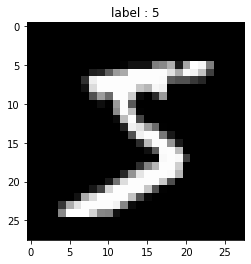

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()

## 前処理

In [26]:
# 0から1のfloat型に変換
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [27]:
# one-hot表現 に変換
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [28]:
# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [29]:
clf=Scratch1dCNNClassifier(epoch=1, batch_size=20, lr=0.01, optimizer='SGD', sigma=0.1, stride=1, padding=0)
clf.add_convolution(FN=1, C=1, FH=1, FW=3, activation=None, pooling=None)
clf.add_affine(n_nodes1=784, n_nodes2=200, activation = 'sigmoid')
clf.add_affine(n_nodes1=200, n_nodes2=10, activation = 'softmax')

In [30]:
clf.fit(X_train.reshape(48000,1,1,784), y_train)

ValueError: axes don't match array